In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [16]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CustomerID               200 non-null    int64 
 1    Gender                  200 non-null    object
 2    Age                     200 non-null    int64 
 3    Annual Income (k$)      200 non-null    int64 
 4    Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
data.isnull().sum()

CustomerID                 0
 Gender                    0
 Age                       0
 Annual Income (k$)        0
 Spending Score (1-100)    0
dtype: int64

In [18]:
data.drop(columns=['CustomerID',' Gender'], inplace=True)


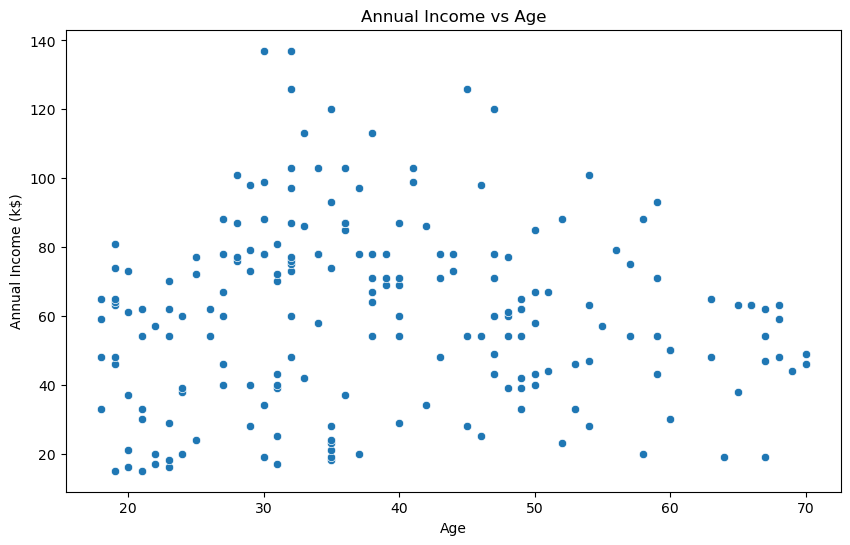

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Age', y=' Annual Income (k$)', data=data)
plt.title('Annual Income vs Age')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Age')
plt.show()

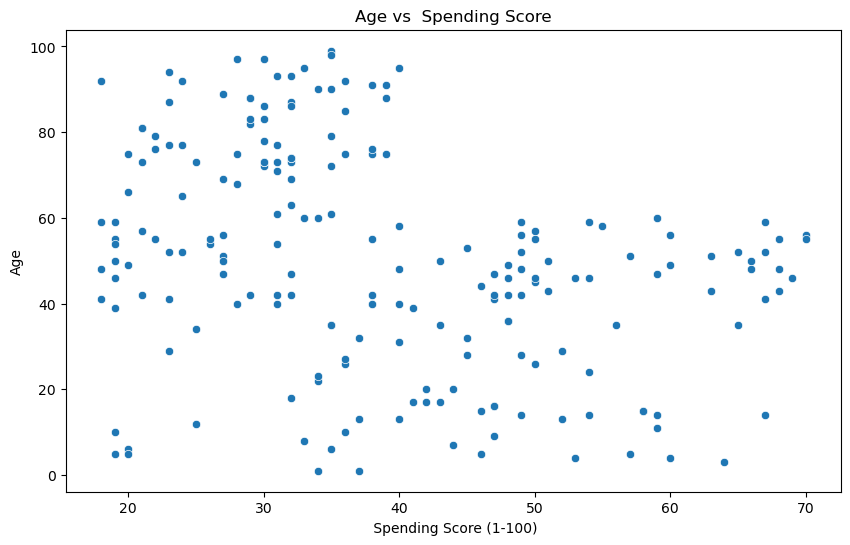

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Age', y=' Spending Score (1-100)', data=data)
plt.title('Age vs  Spending Score')
plt.ylabel('Age')
plt.xlabel(' Spending Score (1-100)')
plt.show()

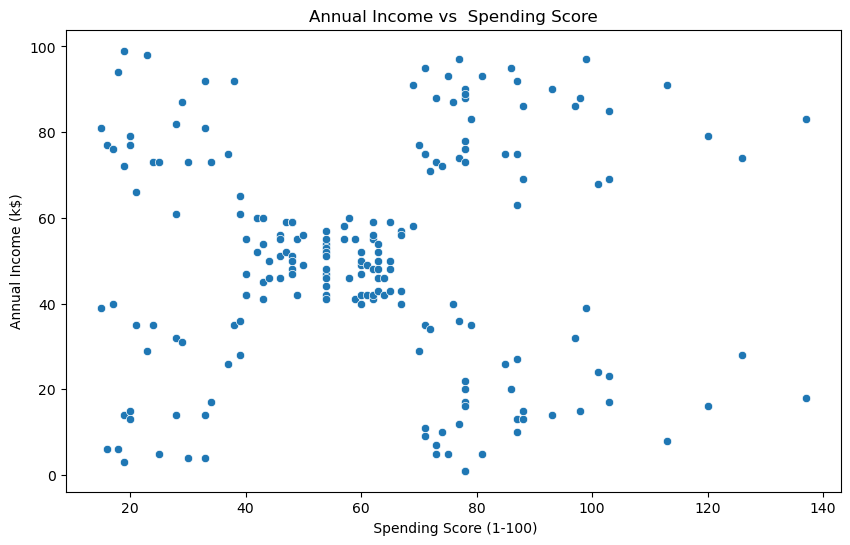

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Annual Income (k$)', y=' Spending Score (1-100)', data=data)
plt.title('Annual Income vs  Spending Score')
plt.ylabel('Annual Income (k$)')
plt.xlabel(' Spending Score (1-100)')
plt.show()

In [24]:
data.skew()

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [28]:
def skewness_names(skewness):
    if skewness >0:
        return 'right skewed'
    elif skewness <0:
        return 'left skewed'
    else:
        return 'normal'
print('skewness of age: ', skewness_names(data[' Age'].skew()))
print('skewness of annual income: ', skewness_names(data[' Annual Income (k$)'].skew()))
print('skewness of spending score: ', skewness_names(data[' Spending Score (1-100)'].skew()))

skewness of age:  right skewed
skewness of annual income:  right skewed
skewness of spending score:  left skewed


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
data = pd.DataFrame(scaled_data, columns=data.columns)
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [30]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data)
data['Cluster'] = kmeans.labels_
data.head()

c:\Users\tranu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


c:\Users\tranu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tranu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tranu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tranu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

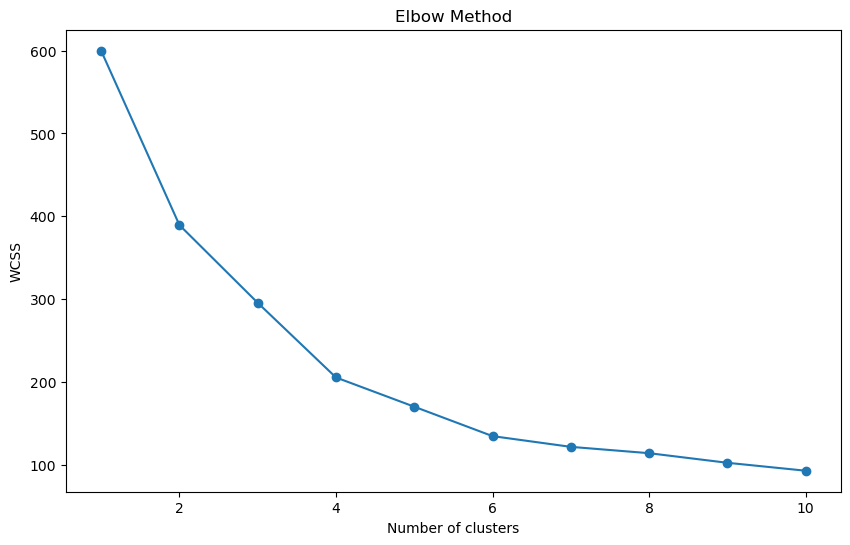

In [31]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data.drop('Cluster', axis=1))
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

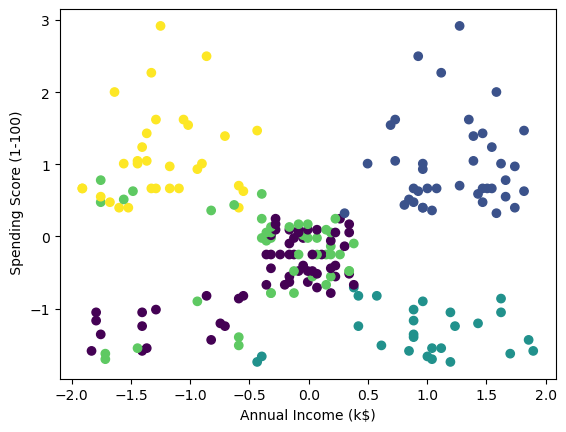

In [36]:
# display clusters
plt.scatter(data[' Spending Score (1-100)'], data[' Annual Income (k$)'], c=data['Cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel(' Spending Score (1-100)')
plt.show()

In [38]:
data.to_csv('Clustered_Mall_Customers.csv', index=False)

In [39]:
df = pd.read_csv('Clustered_Mall_Customers.csv')
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
X = df.drop('Cluster', axis=1)
y = df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5
           2       0.60      1.00      0.75         3
           3       1.00      0.83      0.91        12
           4       1.00      1.00      1.00        10

    accuracy                           0.95        40
   macro avg       0.92      0.97      0.93        40
weighted avg       0.97      0.95      0.95        40

[[10  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  2 10  0]
 [ 0  0  0  0 10]]
Accuracy:  0.95


In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print('Accuracy: ', accuracy_score(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      0.92      0.96        12
           4       1.00      1.00      1.00        10

    accuracy                           0.97        40
   macro avg       0.98      0.98      0.98        40
weighted avg       0.98      0.97      0.98        40

[[10  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 1  0  0 11  0]
 [ 0  0  0  0 10]]
Accuracy:  0.975


In [43]:
import joblib
joblib.dump(model, 'kmeans_model.pkl')

['kmeans_model.pkl']